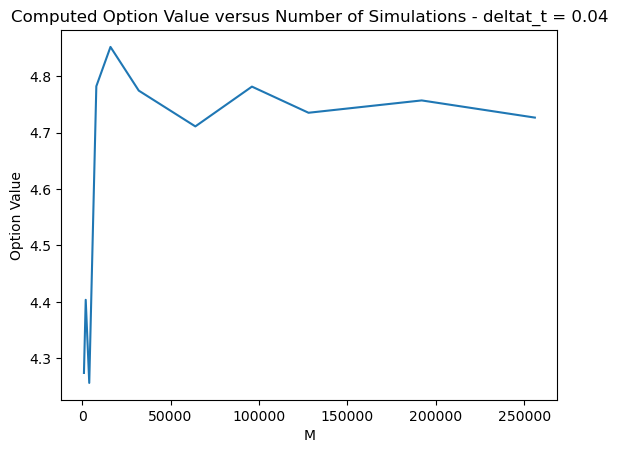

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

r = 0.08
T = 1
K = 101
S0 = 100
gamma = 20
eps = 1e-8
M = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 96000, 128000, 192000, 256000]

def monte_carlo_option_pricing(delta_t, M, r, T, K, S0, gamma, eps):
    S = S0*np.ones(M)
    N = T/delta_t
    for i in np.arange(N):
        drift = r*delta_t
        S = S + S*drift + gamma*np.sqrt(delta_t)*np.random.normal(0, 1, M)
        S = np.maximum(S, eps)
    payoff = np.maximum(K - S, 0)
    V = np.exp(-r*T)*sum(payoff)/M
    return V


def generate_plot(delta_t):
    V = []
    for m in M:
        v = monte_carlo_option_pricing(delta_t1, m, r, T, K, S0, gamma, eps)
        V.append(v)
    plt.plot(M, V)
    plt.title("Computed Option Value versus Number of Simulations - deltat_t = " + str(delta_t))
    plt.xlabel("M")
    plt.ylabel("Option Value")
    plt.show()

delta_t1 = 10/250
generate_plot(delta_t1)


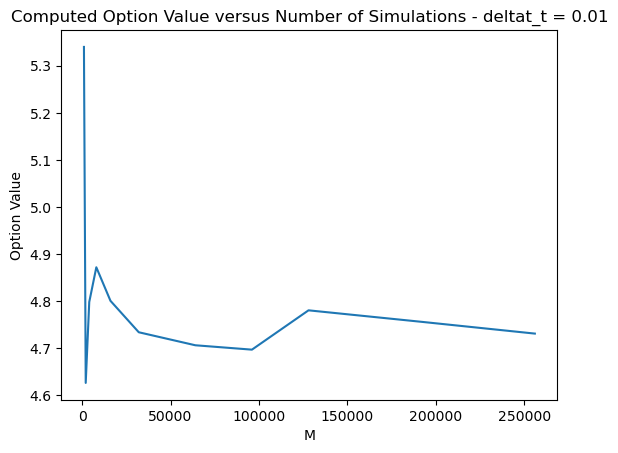

In [17]:
delta_t2 = 2.5/250
generate_plot(delta_t2)

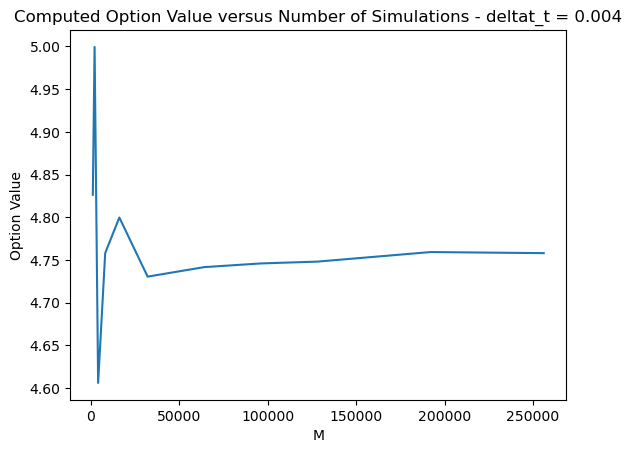

In [21]:
delta_t3 = 1/250
generate_plot(delta_t3)

By observing the three plots above, we find that as the number of simulations M increases, the trend of computed option value becomes stable around a value, which is between 4.7 and 4.8. Also, as the $\Delta$t becomes smaller, it becomes stable earlier.

In [22]:
def monte_carlo_vector(delta_t, M, r, T, K, S0, gamma, eps):
    S = S0*np.ones(M)
    N = T/delta_t
    for i in np.arange(N):
        drift = r*delta_t
        S = S + S*drift + gamma*np.sqrt(delta_t)*np.random.normal(0, 1, M)
        S = np.maximum(S, eps)
    payoff = np.maximum(K - S, 0)
    V = np.exp(-r*T)*payoff
    return V

mean = []
upper_bound = []
lower_bound = []

for m in M:
    V_list = monte_carlo_vector(delta_t3, m, r, T, K, S0, gamma, eps)
    v_mean = np.mean(V_list)
    mean.append(v_mean)
    v_sd = np.std(V_list)
    upper_bound.append(v_mean + 1.96*v_sd/np.sqrt(m))
    lower_bound.append(v_mean - 1.96*v_sd/np.sqrt(m))

print("M\t Estimated Option Value \t Upper Bound Value\tLower Bound Value")
for i in np.arange(len(M)):
    print("%d \t\t%0.5f \t\t\t%0.5f \t\t%0.5f" % (M[i], mean[i], upper_bound[i], lower_bound[i]))

M	 Estimated Option Value 	 Upper Bound Value	Lower Bound Value
1000 		4.65003 			5.21687 		4.08320
2000 		4.79102 			5.18091 		4.40113
4000 		4.55798 			4.83278 		4.28319
8000 		4.72813 			4.92569 		4.53057
16000 		4.73605 			4.87319 		4.59891
32000 		4.80618 			4.90435 		4.70801
64000 		4.73858 			4.80739 		4.66977
96000 		4.76978 			4.82609 		4.71347
128000 		4.75895 			4.80780 		4.71010
192000 		4.78777 			4.82763 		4.74792
256000 		4.73412 			4.76856 		4.69968


As the number of simulations M increases, the upper bound and the lower bound values are becoming closer to the estimated option value. Also, the difference between the upper bound value and the lower bound value is becoming smaller.